# Прогноз продаж игр на консоли на 2017 год 

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод 

* Стоит подумать, как поступить с очень большим кол-вом пропусков в столбцах `critic_score` и `user_score`, `rating`;
* Привести все к змеиному регистру;
* Привести данные в нужные типы.

## Шаг 2. Предобработка данных

### Приводим столбцы к нижнему регистру

In [5]:
data = data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

### Избавляемся от пропусков

Ввиду малого кол-ва пропусков в этих столбцах, просто избавляемся от них.

In [6]:
data = data.dropna(subset=['name', 'genre'])

### Работа с пропусками

Выводим уникальные значения столбцов с большим кол-вом пропусков.

In [7]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [8]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Везде есть НаНы, в столбце с рейтингом от юзеров видим аббревиатуру tbd от английского to be done. Значит, отзывы еще будут написаны.

Принимаю решение заменить пропуски заглушками, т.к. восстановить достоверные данные не представляется возможным.

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(-1)

In [11]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [12]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data['rating'] = data['rating'].fillna('unknown')

In [14]:
data['critic_score'] = data['critic_score'].fillna('-1')

In [15]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype(float)

In [16]:
data['user_score'] = data['user_score'].fillna('-1')
data['user_score'] = data['user_score'].astype('float')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  object 
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [18]:
data['critic_score']=data['critic_score'].astype(float)

In [19]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Добавляем новый столбец с общим количеством продаж по каждой игре.

In [20]:
data['total_sales'] = data.loc[:, 'na_sales':'other_sales'].sum(1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,unknown,0.01


### Вывод

* Заменили названия столбцов;
* Преобразовали данные в нужные типы;
* Обработали пропуски;
* Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

## Шаг 3. Исследовательский анализ данных.

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [21]:
data_games=data.pivot_table(index=['year_of_release'], values=['name'], aggfunc='count')
data_games.reset_index(inplace=True)
data_games1=data_games[data_games['year_of_release']>1979]
data_games1

,year_of_release,name
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


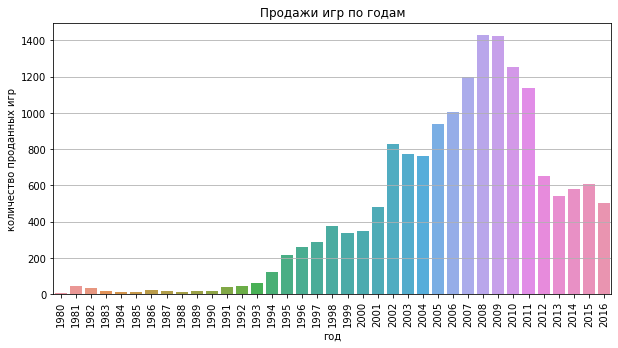

In [22]:
fig, ax = plt.subplots()
ax.grid()
ax.set_title('Продажи игр по годам')
sns.barplot(x=(data_games1['year_of_release']),y=data_games1['name'])
ax.set_xlabel('год')
ax.set_ylabel('количество проданных игр')
plt.xticks(rotation=90)
fig.set_figwidth(10)
fig.set_figheight(5)
plt.show()

До 2002 года продавалось существенно меньше игр, данные до этого года можно не учитывать.

In [23]:
data=data[data['year_of_release'].isin([2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])]

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [24]:
games_by_platforms=data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
games_by_platforms.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1027.96
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
PSP,289.53
3DS,257.81
GBA,251.28


Можно выделить топ-6 платформ: PS2, X360, Wii, PS3, DS, PS

In [25]:
top_platforms=games_by_platforms.nlargest(6, 'total_sales')
top_platforms

,total_sales
platform,
PS2,1027.96
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14


In [26]:
pivot_top_platforms=data.query('platform in (@top_platforms.index)').pivot_table(index='year_of_release',
                                                                                 columns='platform',
                                                                                values='total_sales',
                                                                                aggfunc='sum')
pivot_top_platforms

platform,DS,PS2,PS3,PS4,Wii,X360
year_of_release,,,,,,
2002,NaN,205.38,NaN,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,NaN,8.25
2006,119.81,103.42,20.96,NaN,137.15,51.62
2007,146.94,75.99,73.19,NaN,152.77,95.41
2008,145.31,53.90,118.52,NaN,171.32,135.26
2009,119.54,26.40,130.93,NaN,206.97,120.29
2010,85.02,5.64,142.17,NaN,127.95,170.03


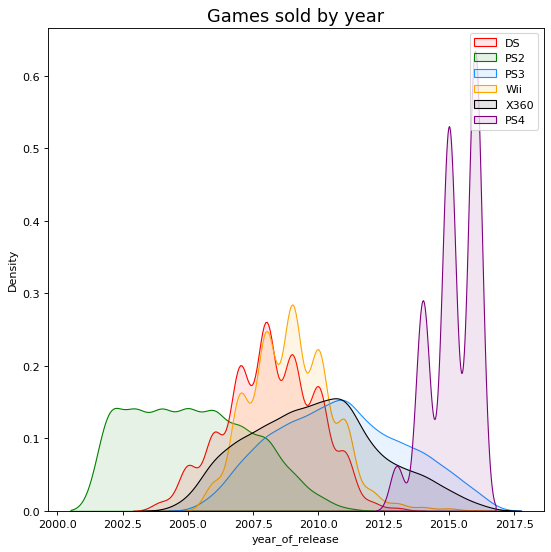

In [27]:
plt.figure(figsize=(8,8), dpi= 80)
sns.kdeplot(data.loc[data['platform'] == 'DS', 'year_of_release'], shade=True, color="r", label="DS", alpha=.1)
sns.kdeplot(data.loc[data['platform'] == 'PS2', 'year_of_release'], shade=True, color="g", label="PS2", alpha=.1)
sns.kdeplot(data.loc[data['platform'] == 'PS3', 'year_of_release'], shade=True, color="dodgerblue", label="PS3", alpha=.1)
sns.kdeplot(data.loc[data['platform'] == 'Wii', 'year_of_release'], shade=True, color="orange", label="Wii", alpha=.1)
sns.kdeplot(data.loc[data['platform'] == 'X360', 'year_of_release'], shade=True, color="black", label="X360", alpha=.1)
sns.kdeplot(data.loc[data['platform'] == 'PS4', 'year_of_release'], shade=True, color="purple", label="PS4", alpha=.1)

plt.title('Games sold by year', fontsize=16)
plt.legend()
plt.show()

В среднем срок жизни платформы составляет 10 лет. Исключением является платформа X360, т.к. она живет уже около 15 лет, но большее кол-во продаж пришлось как раз на 10-летний временной промежуток. Платформа PS4 появилась относительно недавно, но имеет самое большое кол-во продаж за последние 4 года.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Данные с 2015 года можно считать актуальными, т.к. принято считать актуальным перииод в 2-3 года от нынешней даты.

In [28]:
modern_data= data[data['year_of_release'].isin([2015,2016])]
modern_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,unknown,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


In [29]:
modern_sales=modern_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
modern_sales=modern_sales.sort_values(by='total_sales', ascending=False).reset_index()
modern_sales

,platform,total_sales
0,PS4,188.15
1,XOne,86.29
2,3DS,42.92
3,WiiU,20.95
4,PS3,20.42
5,PC,13.77
6,X360,13.48
7,PSV,10.50
8,Wii,1.32
9,PSP,0.12


Можно выделить топ-5 платформ: PS4, PS3, XOne, 3DS и WiiU.

In [30]:
modern_platforms=modern_data[modern_data['platform'].isin(['PS4', 'PS3', 'XOne', '3DS', 'WiiU'])]

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

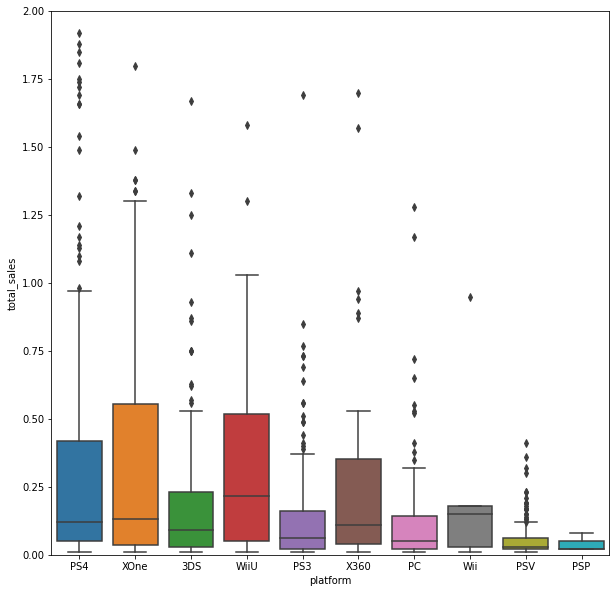

In [31]:
plt.figure(figsize=(10,10))
plt.ylim([0,2])
sns.boxplot(data=modern_data, x='platform', y='total_sales')

Медианное значение у всех платформ варьируется от 0.1 до 0.25. 50% значений лежат в диапазоне от 0.1 до 0.5.

Нулевая гипотеза: Значения между данными со всеми и платформами и топовыми платформами не различаются

Альтернативная гипотеза: Значения между данными со всеми платформами и топовыми платформами различаются

In [32]:
alpha=0.05
results = st.ttest_ind(
    modern_data['total_sales'], modern_platforms['total_sales'])

if results.pvalue < alpha:
    print ('Принимаем альтернативную гипотезу')
else:
    print ('Опровергнуть нулевую гипотезу нельзя')

Принимаем альтернативную гипотезу


### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [33]:
ps3_users=modern_data[(modern_data['platform']=='PS3') & (modern_data['user_score'] != -1.0)]
wiiu_users=modern_data[(modern_data['platform']=='WiiU') & (modern_data['user_score'] != -1.0)]
ps4_users=modern_data[(modern_data['platform']=='PS4') & (modern_data['user_score'] != -1.0)]
_3ds_users=modern_data[(modern_data['platform']=='3DS') & (modern_data['user_score'] != -1.0)]
xone_users=modern_data[(modern_data['platform']=='XOne') & (modern_data['user_score'] != -1.0)]

In [34]:
ps3_critic=modern_data[(modern_data['platform']=='PS3') & (modern_data['critic_score'] != -1.0)]
wiiu_critic=modern_data[(modern_data['platform']=='WiiU') & (modern_data['critic_score'] != -1.0)]
ps4_critic=modern_data[(modern_data['platform']=='PS4') & (modern_data['critic_score'] != -1.0)]
_3ds_critic=modern_data[(modern_data['platform']=='3DS') & (modern_data['critic_score'] != -1.0)]
xone_critic=modern_data[(modern_data['platform']=='XOne') & (modern_data['critic_score'] != -1.0)]

<AxesSubplot:xlabel='total_sales'>

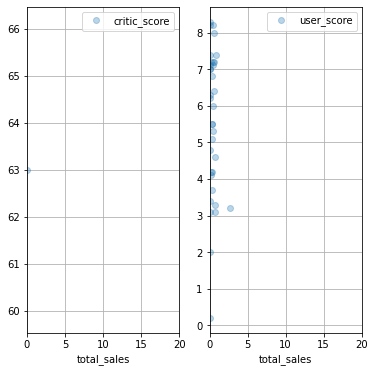

In [35]:
ax = plt.subplot(1, 2, 1)
ps3_critic.plot(x='total_sales', y='critic_score', style = 'o', xlim = (0, 20), grid = True, figsize=(6, 6), alpha=0.3, ax=ax)
ax = plt.subplot(1, 2, 2)
ps3_users.plot(x='total_sales', y='user_score', style = 'o', xlim = (0, 20), grid = True, figsize=(6, 6), alpha=0.3, ax=ax)

In [36]:
ps3_critic['total_sales'].corr(ps3_critic['critic_score'])

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


nan

При изменении актуального периода, платформа PS3 выпадает из списка, у нее остается одна игра с оценкой критиков, а если период с 2011, то таких игр — 349.

In [37]:
# check
data[(data['platform']=='PS3') & (data['critic_score'] != -1.0)  & (data['year_of_release'] >= 2015)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15418,Xblaze: Lost Memories,PS3,2015,Adventure,0.02,0.0,0.0,0.0,63.0,6.2,M,0.02


In [38]:
# check
data[(data['platform']=='PS3') & (data['critic_score'] != -1.0)  & (data['year_of_release'] >= 2011)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
...,...,...,...,...,...,...,...,...,...,...,...,...
15567,Tom Clancy's Splinter Cell Classic Trilogy HD,PS3,2011,Action,0.02,0.00,0.00,0.00,67.0,6.8,M,0.02
15742,Invizimals: The Lost Kingdom,PS3,2013,Action,0.00,0.02,0.00,0.00,50.0,5.0,E10+,0.02
15880,Turbo: Super Stunt Squad,PS3,2013,Sports,0.00,0.01,0.00,0.00,38.0,-1.0,E,0.01
16146,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01


In [39]:
ps3_users['total_sales'].corr(ps3_users['user_score'])

-0.16529542277898504

<AxesSubplot:xlabel='total_sales'>

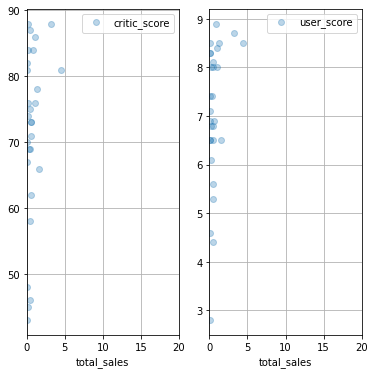

In [40]:
ax = plt.subplot(1, 2, 1)
wiiu_critic.plot(x='total_sales', y='critic_score', style = 'o', xlim = (0, 20), grid = True, figsize=(6, 6), alpha=0.3, ax=ax)
ax = plt.subplot(1, 2, 2)
wiiu_users.plot(x='total_sales', y='user_score', style = 'o', xlim = (0, 20), grid = True, figsize=(6, 6), alpha=0.3, ax=ax)

In [41]:
wiiu_critic['total_sales'].corr(wiiu_critic['critic_score'])

0.31704571176962204

In [42]:
wiiu_users['total_sales'].corr(wiiu_users['user_score'])

0.36351857248094444

<AxesSubplot:xlabel='total_sales'>

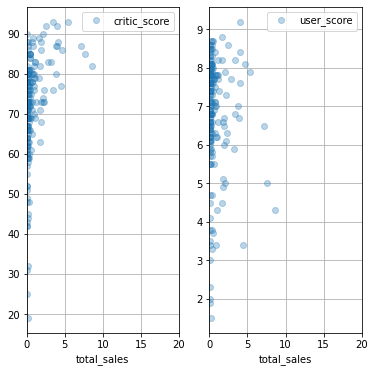

In [43]:
ax = plt.subplot(1, 2, 1)
ps4_critic.plot(x='total_sales', y='critic_score', style = 'o', xlim = (0, 20), grid = True, figsize=(6, 6), alpha=0.3, ax=ax)
ax = plt.subplot(1, 2, 2)
ps4_users.plot(x='total_sales', y='user_score', style = 'o', xlim = (0, 20), grid = True, figsize=(6, 6), alpha=0.3, ax=ax)

In [44]:
ps4_critic['total_sales'].corr(ps4_critic['critic_score'])

0.3928485555130601

In [45]:
ps4_users['total_sales'].corr(ps4_users['user_score'])

-0.05973845712638215

<AxesSubplot:xlabel='total_sales'>

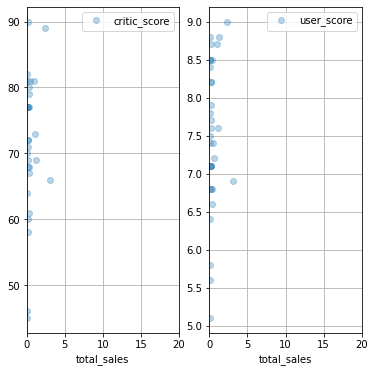

In [46]:
ax = plt.subplot(1, 2, 1)
_3ds_critic.plot(x='total_sales', y='critic_score', style = 'o', xlim = (0, 20), grid = True, figsize=(6, 6), alpha=0.3, ax=ax)
ax = plt.subplot(1, 2, 2)
_3ds_users.plot(x='total_sales', y='user_score', style = 'o', xlim = (0, 20), grid = True, figsize=(6, 6), alpha=0.3, ax=ax)

In [47]:
_3ds_critic['total_sales'].corr(_3ds_critic['critic_score'])

0.17757455046092874

In [48]:
_3ds_users['total_sales'].corr(_3ds_users['user_score'])

0.19879627008102985

<AxesSubplot:xlabel='total_sales'>

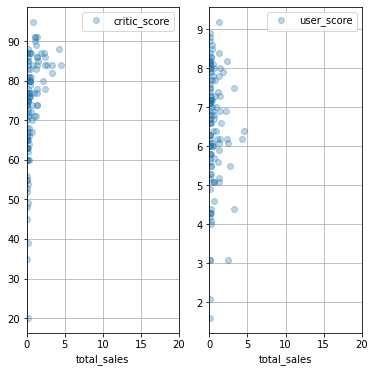

In [49]:
ax = plt.subplot(1, 2, 1)
xone_critic.plot(x='total_sales', y='critic_score', style = 'o', xlim = (0, 20), grid = True, figsize=(6, 6), alpha=0.3, ax=ax)
ax = plt.subplot(1, 2, 2)
xone_users.plot(x='total_sales', y='user_score', style = 'o', xlim = (0, 20), grid = True, figsize=(6, 6), alpha=0.3, ax=ax)

In [50]:
xone_critic['total_sales'].corr(xone_critic['critic_score'])

0.430888745821368

In [51]:
xone_users['total_sales'].corr(xone_critic['user_score'])

-0.06868389218473443

Таким образом, видно, что продажи игр не имеют сильной зависимости от отзывов критиков и пользователей.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [52]:
data_genres=modern_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
data_genres.reset_index(drop=False, inplace=True)
data_genres.sort_values(by='total_sales', ascending=False)

,genre,total_sales
8,Shooter,105.73
0,Action,102.13
10,Sports,64.33
7,Role-Playing,55.82
3,Misc,14.17
2,Fighting,12.37
1,Adventure,11.98
6,Racing,10.86
4,Platform,9.28
9,Simulation,7.55


<AxesSubplot:xlabel='genre', ylabel='total_sales'>

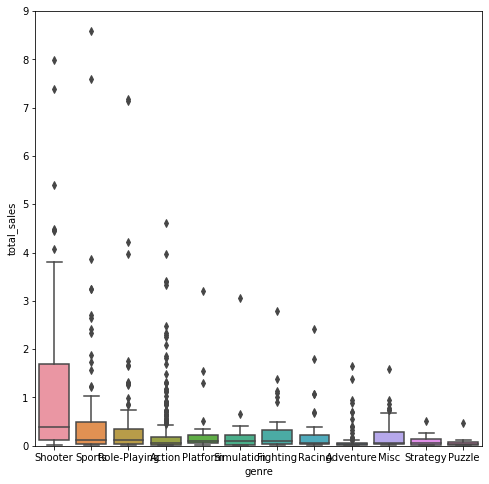

In [53]:
plt.figure(figsize=(8,8))
plt.ylim([0,9])
sns.boxplot(data=modern_data, x='genre', y='total_sales')

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

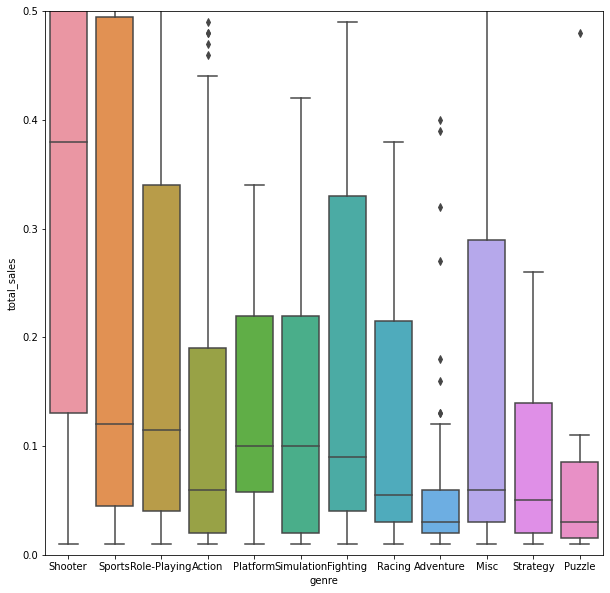

In [54]:
plt.figure(figsize=(10,10))
plt.ylim([0,0.5])
sns.boxplot(data=modern_data, x='genre', y='total_sales')

Благодаря диаграме размаха стало видно, что прибыльных жанров больше 4-х: Shooter, Sports, Role-Playing, Fighting, Misc. Action имеет большое кол-во продаж в целом, но медианное значение у него ниже, чем у других топовых жанров, а также у него очень много выбросов. Самыми стабильными можно назвать жанры Shooter и Sports.

### Вывод

* Выяснилось, что средний срок жизни платформы составляет 10 лет. 
* Актуальными данными считаются данные за 2015 год и новее.
* Топ-5 платформ: PS3, PS4, XOne, WiiU и 3DS. 
* Продажи игр не имеют сильной зависимости от отзывов критиков и пользователей. 
* Прибыльные жанры: Sports, Shooter, Role-playing, Fighting, Misc. Наименее прибыльные: Adventure и Puzzle.

## Портрет пользователя для каждого региона

### Топ-5 платформ по регионам

In [55]:
na_data = modern_data.sort_values(by=('na_sales'), ascending = False)
drop_list = ["name","total_sales", "critic_score", "user_score", "platform", "rating", "year_of_release", "genre", "na_sales"]
na_data = na_data.drop(na_data.columns.difference(drop_list), axis=1)
na_data = na_data.pivot_table(index='platform', values=['na_sales'], aggfunc='sum').reset_index()
na_data.columns = ['platform', 'na_sales']
def platforms(platform):
    if platform == '3DS':
        return ('3DS')
    elif platform == 'PS4':
        return ('PS4')
    elif platform == 'WiiU':
        return ('WiiU')
    elif platform == 'X360':
        return ('X360')
    elif platform == 'XOne':
        return ('XOne')
    else:
        return ('другие')
na_data['platform']=na_data['platform'].apply(platforms)

In [56]:
eu_data = modern_data.sort_values(by=('eu_sales'), ascending = False)
drop_list = ["name","total_sales", "critic_score", "user_score", "platform", "rating", "year_of_release", "genre", "eu_sales"]
eu_data = eu_data.drop(eu_data.columns.difference(drop_list), axis=1)
eu_data = eu_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index()
eu_data.columns = ['platform', 'eu_sales']
def platforms(platform):
    if platform == '3DS':
        return ('3DS')
    elif platform == 'PS4':
        return ('PS4')
    elif platform == 'PC':
        return ('PC')
    elif platform == 'PS3':
        return ('PS3')
    elif platform == 'XOne':
        return ('XOne')
    else:
        return ('другие')
eu_data['platform']=eu_data['platform'].apply(platforms)

In [57]:
jp_data = modern_data.sort_values(by=('jp_sales'), ascending = False)
drop_list = ["name","total_sales", "critic_score", "user_score", "platform", "rating", "year_of_release", "genre", "jp_sales"]
jp_data = jp_data.drop(jp_data.columns.difference(drop_list), axis=1)
jp_data = jp_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index()
jp_data.columns = ['platform', 'jp_sales']
def platforms(platform):
    if platform == '3DS':
        return ('3DS')
    elif platform == 'PS4':
        return ('PS4')
    elif platform == 'WiiU':
        return ('WiiU')
    elif platform == 'PS3':
        return ('PS3')
    elif platform == 'PSV':
        return ('PSV')
    else:
        return ('другие')
jp_data['platform']=jp_data['platform'].apply(platforms)

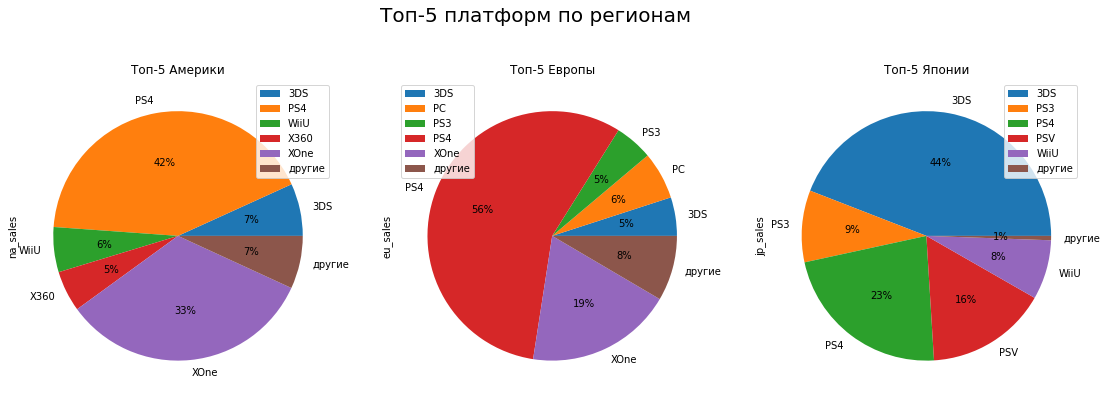

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(19, 8))
fig.suptitle('Топ-5 платформ по регионам',
             y = 0.9,
             fontsize = 20)
na_data.groupby(['platform']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%', ax=ax1)
ax1.set_title('Топ-5 Америки')
eu_data.groupby(['platform']).sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%', ax=ax2)
ax2.set_title('Топ-5 Европы')
jp_data.groupby(['platform']).sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%', ax=ax3)
ax3.set_title('Топ-5 Японии')
plt.show()

В Америке и Европе лидирует PS4, в то время как в Японии - 3DS. XOne пользуется популярностью в Европе и в Америке, в Японии не входит даже в топ-5. Также доволно популярной платформой в Японии можно считать PS4 и PSV. В Америке и Европе около 7-8% от общего рынка занимают другие платформы (не входящие в топ-5), в Японии таких меньше 1%.

### Топ-5 жанров по регионам

In [59]:
na_genres_data = modern_data.sort_values(by=('na_sales'), ascending = False)
drop_list = ["name", "critic_score", "user_score", "platform", "rating", "year_of_release", 'na_sales']
na_genres_data = na_genres_data.drop(na_data.columns.difference(drop_list), axis=1)
na_genres_data = na_genres_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index()
na_genres_data.columns = ['genre', 'na_sales']
na_genres_data.reset_index(drop=True)
def genres(genre):
    if genre == 'Action':
        return ('Action')
    elif genre == 'Role-Playing':
        return ('Role-Playing')
    elif genre == 'Shooter':
        return ('Shooter')
    elif genre == 'Sports':
        return ('Sports')
    elif genre == 'Misc':
        return ('Misc')
    else:
        return ('другие')
na_genres_data['genre']=na_genres_data['genre'].apply(genres)

In [60]:
eu_genres_data = modern_data.sort_values(by=('eu_sales'), ascending = False)
drop_list = ["name", "critic_score", "user_score", "platform", "rating", "year_of_release", 'eu_sales']
eu_genres_data = eu_genres_data.drop(eu_data.columns.difference(drop_list), axis=1)
eu_genres_data = eu_genres_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index()
eu_genres_data.columns = ['genre', 'eu_sales']
eu_genres_data.reset_index(drop=True)
def genres(genre):
    if genre == 'Action':
        return ('Action')
    elif genre == 'Role-Playing':
        return ('Role-Playing')
    elif genre == 'Shooter':
        return ('Shooter')
    elif genre == 'Sports':
        return ('Sports')
    elif genre == 'Racing':
        return ('Racing')
    else:
        return ('другие')
eu_genres_data['genre']=eu_genres_data['genre'].apply(genres)

In [61]:
jp_genres_data = modern_data.sort_values(by=('jp_sales'), ascending = False)
drop_list = ["name", "critic_score", "user_score", "platform", "rating", "year_of_release", 'jp_sales']
jp_genres_data = jp_genres_data.drop(jp_data.columns.difference(drop_list), axis=1)
jp_genres_data = jp_genres_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index()
jp_genres_data.columns = ['genre', 'jp_sales']
jp_genres_data.reset_index(drop=True)
def genres(genre):
    if genre == 'Action':
        return ('Action')
    elif genre == 'Role-Playing':
        return ('Role-Playing')
    elif genre == 'Shooter':
        return ('Shooter')
    elif genre == 'Misc':
        return ('Misc')
    elif genre == 'Adventure':
        return ('Adventure')
    else:
        return ('другие')
jp_genres_data['genre']=jp_genres_data['genre'].apply(genres)

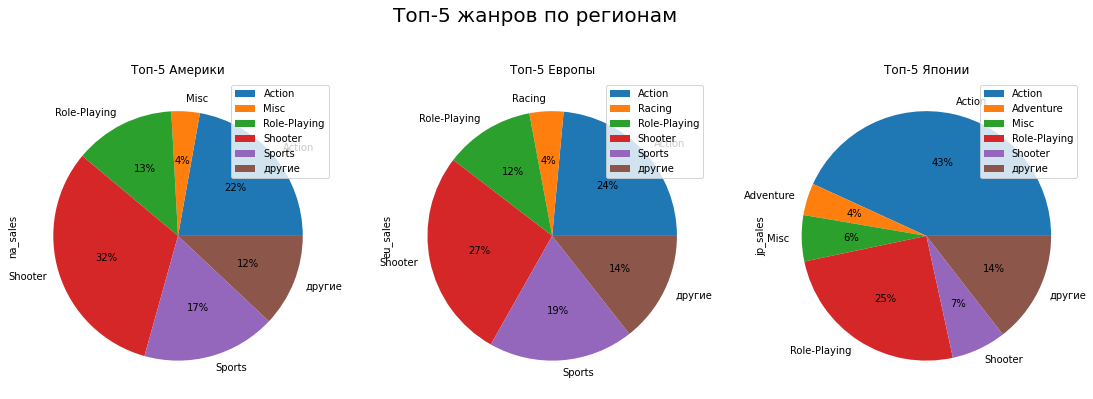

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(19, 8))
fig.suptitle('Топ-5 жанров по регионам',
             y = 0.9,
             fontsize = 20)
eu_genres_data.groupby(['genre']).sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%', ax=ax2)
ax2.set_title('Топ-5 Европы')
jp_genres_data.groupby(['genre']).sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%', ax=ax3)
ax3.set_title('Топ-5 Японии')
na_genres_data.groupby(['genre']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%', ax=ax1)
ax1.set_title('Топ-5 Америки')
plt.show()

Здесь видно, что у Америки и Европы похожая картина, также, как и с платформами — на 1 месте Shooter, на 2 — Action, на 3 — Sports, на 4 — Role-playing. Лишь 5 место отличается: в Америке это Misc, в Европе — Racing. От 12 до 14% занимают другие жанры. В Японии ситуация другая: 1 место — Action, 2 —Role-Playing, 14% — другие, и меньше 10% каждый занимают жанры Shooter, Misc и Adventure.

### Влияние рейтинга на продажи по регионам

In [63]:
na_datar = modern_data.sort_values(by=('na_sales'), ascending = False)
drop_list = ["name","total_sales", "critic_score", "user_score", "platform", "year_of_release", "genre", "na_sales", 'rating']
na_datar = na_datar.drop(na_datar.columns.difference(drop_list), axis=1)
na_datar = na_datar.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index()
na_datar.columns = ['rating', 'na_sales']
na_datar.reset_index(drop=True)

jp_datar = modern_data.sort_values(by=('jp_sales'), ascending = False)
drop_list = ["name","total_sales", "critic_score", "user_score", "platform", "year_of_release", "genre", "jp_sales", 'rating']
jp_datar = jp_datar.drop(jp_datar.columns.difference(drop_list), axis=1)
jp_datar = jp_datar.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index()
jp_datar.columns = ['rating', 'jp_sales']
jp_datar.reset_index(drop=True)

eu_datar = modern_data.sort_values(by=('eu_sales'), ascending = False)
drop_list = ["name","total_sales", "critic_score", "user_score", "platform", "year_of_release", "genre", "eu_sales", 'rating']
eu_datar = eu_datar.drop(eu_datar.columns.difference(drop_list), axis=1)
eu_datar = eu_datar.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index()
eu_datar.columns = ['rating', 'eu_sales']
eu_datar.reset_index(drop=True)

,rating,eu_sales
0,E,34.83
1,E10+,11.54
2,M,45.54
3,T,20.32
4,unknown,35.71


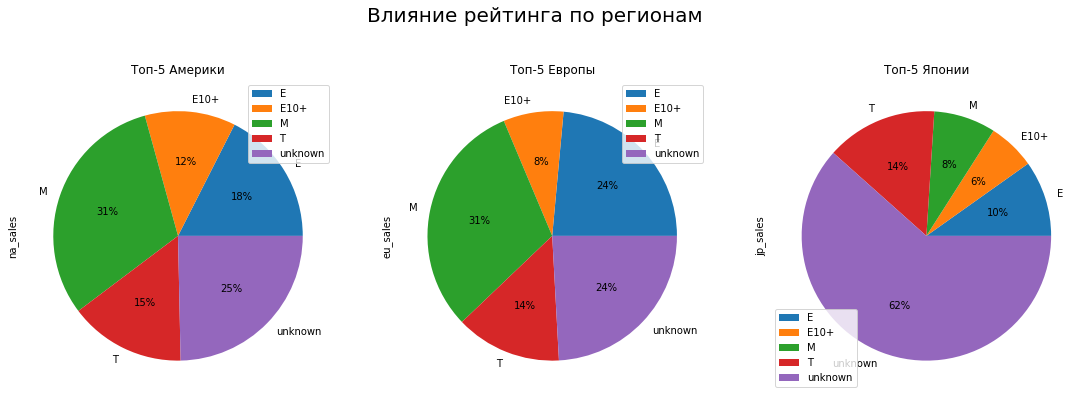

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(19, 8))
fig.suptitle('Влияние рейтинга по регионам',
             y = 0.9,
             fontsize = 20)
eu_datar.groupby(['rating']).sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%', ax=ax2)
ax2.set_title('Топ-5 Европы')
jp_datar.groupby(['rating']).sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%', ax=ax3)
ax3.set_title('Топ-5 Японии')
na_datar.groupby(['rating']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%', ax=ax1)
ax1.set_title('Топ-5 Америки')
plt.show()

Снова наблюдаем похожую картину для Америки и Европы: здесь больше всего продано игр с рейтингом M. Четверть данных имеет неизвестный рейтинг, оставшиеся рейтинги практически равноценно разделились по 2-м регионам. В Японии же существует своя система CERO для определения рейтинга игр, поэтому здесь целых 62% продаж под неизвестным рейтингом.

### Вывод

Профили пользователей Америки и Европы очень похожи во всех профилях - платформы, жанры, продажи по рейтингам. В то же время Япония сильно отличается от них и нужно учитывать особенности этого рынка.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [65]:
pc=modern_data[modern_data['platform'].isin(['PC'])]

In [66]:
alpha=0.05
results = st.ttest_ind(
    xone_users['user_score'], pc['user_score'])

print ('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print ('Принимаем альтернативную гипотезу')
else:
    print ('Опровергнуть нулевую гипотезу нельзя')

p-значение: 1.3392170363533423e-06
Принимаем альтернативную гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.\
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [67]:
action=modern_data[modern_data['genre'].isin(['Action'])]
sport=modern_data[modern_data['genre'].isin(['Sports'])]

In [68]:
alpha=0.05
results = st.ttest_ind(
    action['user_score'], sport['user_score'])

print ('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print ('Принимаем альтернативную гипотезу')
else:
    print ('Опровергнуть нулевую гипотезу нельзя')

p-значение: 0.0026068666888654085
Принимаем альтернативную гипотезу


Пояснение:

Гипотезы я выдвигала следуюшим образом: нулевая гипотеза подразумевает под собой отсутсвие каких-либо различий, альтернативная-наоборот. Проверяла с помощью p-value, т.к. уже делала так в прошлом проекте и мне показалось это удобным.

### Вывод

Выяснилось, что пользовательские оценки платформ XBox One и PC различаются, как и у жанров Action и Sports.

## Общий вывод

* Активная продажа игр началась с 2002 года
* В среднем срок жизни платформы составляет 10 лет. Платформа PS4 появилась относительно недавно, но имеет самое большое кол-во продаж за последние 4 года.
* Актуальными данными считаются данные за 2015 год и новее, с помощью них можно сделать прогноз на 2017 год.
* Топ-4 платформ в выбранных регионах: PS4, XOne, WiiU и 3DS. 
* Продажи игр не имеют сильной зависимости от отзывов критиков и пользователей. 
* Прибыльные жанры: Sports, Shooter, Role-playing, Fighting, Misc. Наименее прибыльные: Adventure и Puzzle.
* Профили пользователей Америки и Европы очень похожи во всех профилях - платформы, жанры, продажи по рейтингам. В то же время Япония сильно отличается от них и нужно учитывать особенности этого рынка.

Но также был проведен анализ по регионам. Вот результаты по Северной Америке:
* PS4 здесь лидирует(42%), но также значительную долю рынка занимают XOne(33%). Также в топ-5 входят WiiU, X360 и 3DS.
* В Америке лидирует Shooter(32%), также существенную долю занимает Action(22%). Небольшой процент занимают игры жанра Misc(4%).
* Больше всего продаж у игр с рейтингом M(31%). Это игры для пользователей от 17 лет, что в принципе логично, пользователи этой возрастной группы обычно уже располагают собственными денежными средствами и могут покупать игры. Меньше всего продаж у игр с рейтингом T и E10+, что тоже объяснимо, т.к. это рейтинги на детские и подростовые игры.

Европа:
* Здесь также лидирует PS4, но ему принадлежит целых 56% рынка. Также немаленькую часть занимает XOne(19%), и от 5 до 6% занимают PS3, PC, 3DS.
* В Европе также лидируют Action и Shooter, но на последнем месте Racing(4%).
* В Европе также, как в Америке, больший процент занимают игры с рейтингом M, а еще игры с рейтингом Е(для всех). Категории T и E10+ тоже занимают меньший процент.

Япония:
* В Японии лидером является 3DS, хотя в остальных регионах был аутсайдером. Скорее всего, это связано с тем, что это платформа их страны. Также больой процент занимают PS4(23%) и PSV(16%).
* В Японии лидирует Action(43%), также существенную долю занимает Role-Playing(25%). От 4 до 7% среди топ-5 занимают Shooter, Adventure и Misc.
* Возрастными рейтингами для консольных игр в Японии занимается CERO – некоммерческая организация, основанная в июле 2002-го. Видимо, игры с их рейтингом попали в графу 'unknown', поэтому у нее такой большой процент.